In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_classification

In [17]:
X, Y = make_classification(n_samples=1000, n_informative=2, n_clusters_per_class=1, n_features=2, n_classes=2, n_redundant=0,  random_state=2)

In [13]:
X

array([[ 0.22024028,  0.28503994],
       [ 1.77014103, -1.72394874],
       [ 0.74896623,  0.92341889],
       ...,
       [ 0.88387616,  0.71033038],
       [ 1.61166838, -0.73730675],
       [ 0.66131542,  0.46530137]])

In [14]:
Y

array([1, 0, 1, ..., 1, 0, 1])

In [4]:
pd.DataFrame(X)[1]

0       0.285040
1      -1.723949
2       0.923419
3       0.830562
4      -1.713642
          ...   
9995    1.351398
9996   -1.283990
9997    0.710330
9998   -0.737307
9999    0.465301
Name: 1, Length: 10000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

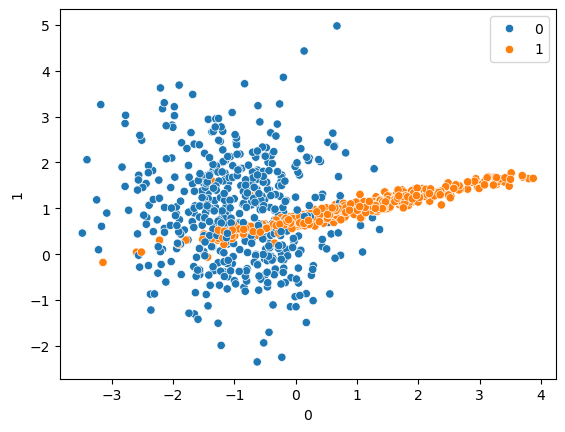

In [18]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=Y )

In [6]:
from sklearn.svm import SVC

In [32]:
svc = SVC(kernel="sigmoid")

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [34]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59       111
           1       0.67      0.63      0.65       139

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250

[[67 44]
 [51 88]]


## hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(C=[0.1, 1, 10, 100, 1000], gamma = [1, 0.1, 0.01, 0.001, 0.0001], kernel = ['rbf'])



gridsearchcv = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=5)

In [43]:
gridsearchcv.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [47]:
y_pred = gridsearchcv.predict(x_test)

In [50]:
gridsearchcv.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       111
           1       0.94      0.99      0.96       139

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[103   8]
 [  2 137]]
